# Project

**Goal:** Use the broad stock index to model and understand the index volatility levels.

**Key methodology:** Use KMeans to build clustering model and then volatility regimes and then build transitional probability distribution among the regimes

# Import Library 

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pyprojroot
from pyprojroot.here import here
import os
import yfinance as yf

In [150]:
base_path = pyprojroot.find_root(pyprojroot.has_file('.here'))
output_dir = os.path.join(base_path, "Data", "out")


In [151]:
# Define the ticker symbol for the S&P 500 index
ticker = '^GSPC'

# Define the start and end dates
start_date = '2013-01-01'
end_date = '2024-12-26'

# Fetch the historical data
sp500_data = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False).reset_index()

# Display the data
sp500_data.head(10)


[*********************100%***********************]  1 of 1 completed


,Date,Close,High,Low,Open,Volume
0,2013-01-02,1462.420044,1462.430054,1426.189941,1426.189941,4202600000
1,2013-01-03,1459.369995,1465.469971,1455.530029,1462.420044,3829730000
2,2013-01-04,1466.469971,1467.939941,1458.989990,1459.369995,3424290000
3,2013-01-07,1461.890015,1466.469971,1456.619995,1466.469971,3304970000
4,2013-01-08,1457.150024,1461.890015,1451.640015,1461.890015,3601600000
5,2013-01-09,1461.020020,1464.729980,1457.150024,1457.150024,3674390000
6,2013-01-10,1472.119995,1472.300049,1461.020020,1461.020020,4081840000
7,2013-01-11,1472.050049,1472.750000,1467.579956,1472.119995,3340650000
8,2013-01-14,1470.680054,1472.050049,1465.689941,1472.050049,3003010000
9,2013-01-15,1472.339966,1473.310059,1463.760010,1470.670044,3135350000


# Overview on Data

In [152]:
# peek view of a few records
data.head(10)

,Date,Close
0,2013-01-02,1462.42
1,2013-01-03,1459.37
2,2013-01-04,1466.47
3,2013-01-07,1461.89
4,2013-01-08,1457.15
5,2013-01-09,1461.02
6,2013-01-10,1472.12
7,2013-01-11,1472.05
8,2013-01-14,1470.68
9,2013-01-15,1472.34


In [153]:
# overview on data schema

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3016 non-null   object 
 1   Close   3016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.3+ KB


# Calculate Moving Average and Volatility

In [154]:
# create a restoration point

data_new = data.copy()

In [155]:
# calculate daily return in %

data_new['Daily_Return'] = data_new['Close'].pct_change(periods=1)

In [156]:
# calculate 30-day moving average volatility

data_new['30_day_vol'] = data_new['Daily_Return'].rolling(30).std()

In [158]:
# examine on calculation result

data_new.head(40)

,Date,Close,Daily_Return,30_day_vol
0,2013-01-02,1462.42,NaN,NaN
1,2013-01-03,1459.37,-0.002086,NaN
2,2013-01-04,1466.47,0.004865,NaN
3,2013-01-07,1461.89,-0.003123,NaN
4,2013-01-08,1457.15,-0.003242,NaN
5,2013-01-09,1461.02,0.002656,NaN
6,2013-01-10,1472.12,0.007597,NaN
7,2013-01-11,1472.05,-0.000048,NaN
8,2013-01-14,1470.68,-0.000931,NaN
9,2013-01-15,1472.34,0.001129,NaN


In [159]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3016 non-null   object 
 1   Close         3016 non-null   float64
 2   Daily_Return  3015 non-null   float64
 3   30_day_vol    2986 non-null   float64
dtypes: float64(3), object(1)
memory usage: 94.4+ KB


In [160]:
# drop data with no moving volatility

data_vol = data_new[['30_day_vol']].dropna(axis=0)
data_vol.head(10)

,30_day_vol
30,0.004513
31,0.004489
32,0.004578
33,0.005172
34,0.005290
35,0.005470
36,0.006398
37,0.006482
38,0.006842
39,0.006850


# Train KMeans Model

## Find the Optimal K, using elbow method

In [161]:
# attempt with different number of clusters and review resulted inertia and silouette scores to identify the best K

def find_best_k_for_kmeans_clustering(dataframe, scaler, kmin, kmax,  random_state=42, figheight=8, figwidth=10):
    scalermethod = scaler;
    dataframe_scaled = pd.DataFrame(data=scaler.fit_transform(dataframe[dataframe.columns]), columns=dataframe.columns);
    from sklearn.metrics import silhouette_score, silhouette_samples;
    inertias = {}
    silhouettes = {}
    for k in range(kmin, kmax):
        kmeans = KMeans(n_clusters=k, random_state=random_state).fit(dataframe_scaled)
        inertias[k] = kmeans.inertia_
        silhouettes[k] = silhouette_score(dataframe_scaled, kmeans.labels_, metric='euclidean')
    import matplotlib.pyplot as plt
    plt.figure(figsize=(figwidth, figheight));
    plt.plot(list(inertias.keys()), list(inertias.values()));
    plt.title('K-Means, Elbow Method')
    plt.xlabel("Number of clusters, K");
    plt.ylabel("Inertia");

    plt.figure(figsize=(figwidth, figheight));
    plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
    plt.title('K-Means, Elbow Method')
    plt.xlabel("Number of clusters, K");
    plt.ylabel("Silhouette");

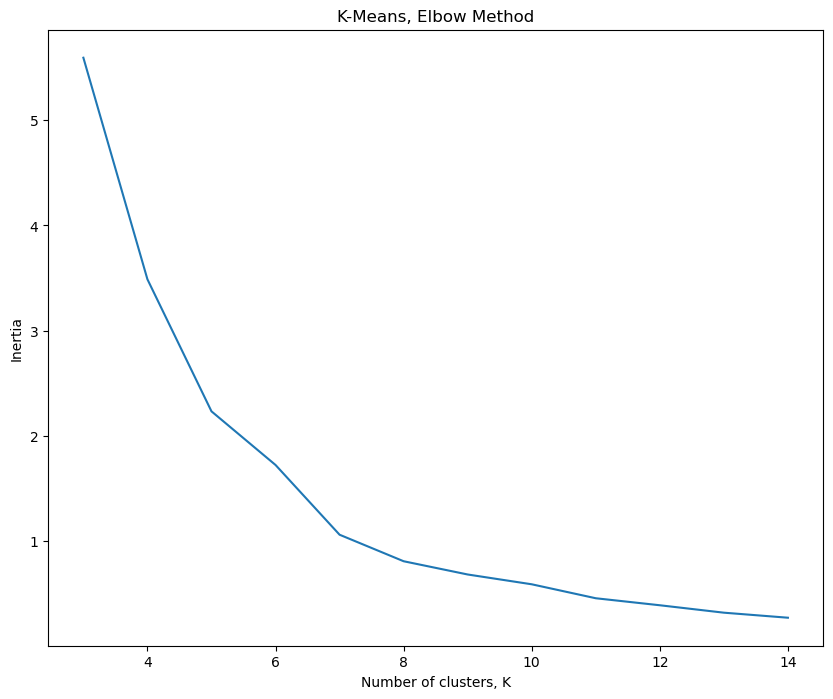

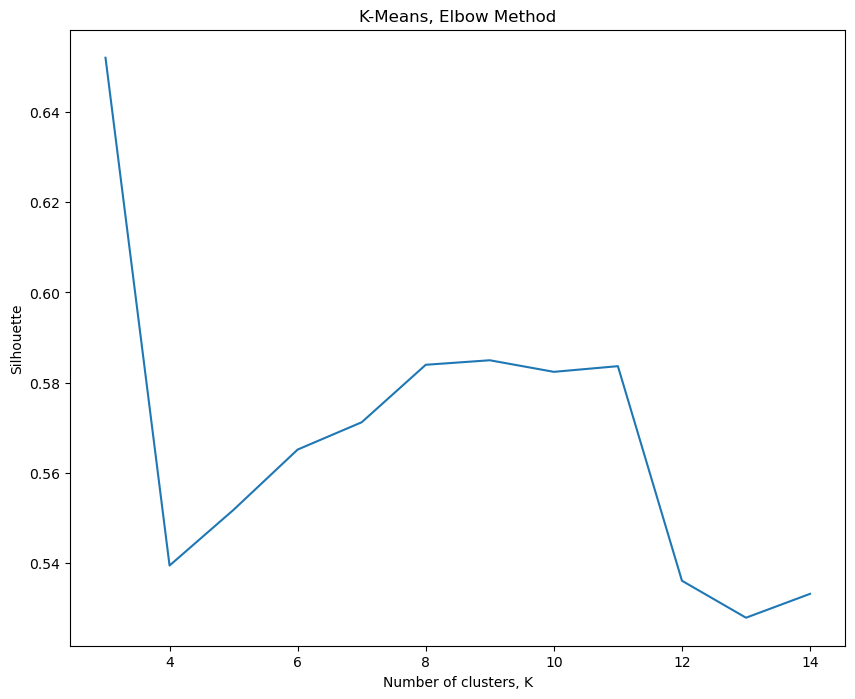

In [162]:
find_best_k_for_kmeans_clustering(data_vol, scaler=MinMaxScaler(), kmin=3, kmax=15)

## Train the Optimal KMeans Model

In [163]:
# train the optimal KMeans model and predict the cluster label

def predict_cluster_with_kmeans(dataframe, optimal_k, scaler, Random_State=42):
    from sklearn.cluster import KMeans;
    kmeans = KMeans(n_clusters=optimal_k, random_state=Random_State);
    dataframe_scaled = pd.DataFrame(data=scaler.fit_transform(dataframe[dataframe.columns]), columns=dataframe.columns);
    dataframe['cluster'] = kmeans.fit_predict(dataframe_scaled)
    return dataframe

In [164]:
data_vol = predict_cluster_with_kmeans(dataframe=data_vol, optimal_k=8, scaler=MinMaxScaler())
data_vol

,30_day_vol,cluster
30,0.004513,0
31,0.004489,0
32,0.004578,0
33,0.005172,0
34,0.005290,0
...,...,...
3011,0.008659,3
3012,0.007289,3
3013,0.007441,3
3014,0.007533,3


In [165]:
# view the descriptive stats on each cluster

def describe_each_cluster(dataframe_with_clusters, name_of_cluster_col): 
  for label in sorted(set(dataframe_with_clusters[name_of_cluster_col])):
    print('\n Cluster {}:'.format(label))
    display(dataframe_with_clusters.loc[dataframe_with_clusters[name_of_cluster_col]==label, :].describe().drop([name_of_cluster_col], axis=1).T)

In [166]:
describe_each_cluster(data_vol, 'cluster')


 Cluster 0:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,528.0,0.004368,0.000618,0.002247,0.004055,0.004486,0.004838,0.005322



 Cluster 1:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,347.0,0.013211,0.000846,0.011825,0.012602,0.013077,0.013907,0.015196



 Cluster 2:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,30.0,0.049472,0.003741,0.041954,0.046175,0.050789,0.052129,0.05374



 Cluster 3:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,707.0,0.00793,0.000537,0.007114,0.007531,0.007853,0.00824,0.009171



 Cluster 4:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,225.0,0.017313,0.00156,0.015291,0.016303,0.016922,0.017939,0.023745



 Cluster 5:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,13.0,0.030593,0.003947,0.024719,0.02685,0.031404,0.033286,0.036441



 Cluster 6:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,721.0,0.00626,0.000461,0.005335,0.005893,0.00628,0.006617,0.00711



 Cluster 7:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,415.0,0.010408,0.000697,0.00918,0.009826,0.010389,0.010943,0.011795


In [167]:
# create the bridging table to relabel clusters, used to create the transitional prob table later

data_vol['Cluster_Vol'] = data_vol.groupby(['cluster'])['30_day_vol'].transform('mean')
data_vol_relabel = data_vol[['cluster', 'Cluster_Vol']].drop_duplicates().sort_values(by=['Cluster_Vol'], ascending=True)
data_vol_relabel['new_cluster'] = range(1, len(data_vol_relabel)+1)
data_vol_relabel

,cluster,Cluster_Vol,new_cluster
30,0,0.004368,1
35,6,0.006260,2
71,3,0.007930,3
117,7,0.010408,4
667,1,0.013211,5
671,4,0.017313,6
1808,5,0.030593,7
1812,2,0.049472,8


In [138]:
# relabel the cluster in ascending order of mean volatility of each regime

data_vol = data_vol.merge(data_vol_relabel[['cluster','new_cluster']], on=['cluster', 'cluster'], how='left').drop(columns=['cluster'], axis=1).rename(columns={'new_cluster': 'cluster'})
data_vol

,30_day_vol,Cluster_Vol,cluster
0,0.004513,0.004368,1
1,0.004489,0.004368,1
2,0.004578,0.004368,1
3,0.005172,0.004368,1
4,0.005290,0.004368,1
...,...,...,...
2981,0.008659,0.007930,3
2982,0.007289,0.007930,3
2983,0.007441,0.007930,3
2984,0.007533,0.007930,3


In [168]:
# review the final clusters

describe_each_cluster(data_vol[['30_day_vol', 'cluster']], 'cluster')


 Cluster 0:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,528.0,0.004368,0.000618,0.002247,0.004055,0.004486,0.004838,0.005322



 Cluster 1:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,347.0,0.013211,0.000846,0.011825,0.012602,0.013077,0.013907,0.015196



 Cluster 2:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,30.0,0.049472,0.003741,0.041954,0.046175,0.050789,0.052129,0.05374



 Cluster 3:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,707.0,0.00793,0.000537,0.007114,0.007531,0.007853,0.00824,0.009171



 Cluster 4:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,225.0,0.017313,0.00156,0.015291,0.016303,0.016922,0.017939,0.023745



 Cluster 5:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,13.0,0.030593,0.003947,0.024719,0.02685,0.031404,0.033286,0.036441



 Cluster 6:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,721.0,0.00626,0.000461,0.005335,0.005893,0.00628,0.006617,0.00711



 Cluster 7:


,count,mean,std,min,25%,50%,75%,max
30_day_vol,415.0,0.010408,0.000697,0.00918,0.009826,0.010389,0.010943,0.011795


# Plot the Regime vs Actual 30_day_Vol

In [169]:
# define plot function

def multiseries_trend_linechart(dataframe, trend=None, is_trend_dataframe_index=True, series=[], series_labels=[], figwidth=20, figheight=10, figtitle=None, legend_location='upper right', trend_axis_label=None, series_label=None):
    plt.figure(figsize=(figwidth, figheight));
    for i in range(0, len(series)):
        if is_trend_dataframe_index:
            plt.plot(dataframe.index, dataframe[series[i]], label=series_labels[i]);
        else:
            plt.plot(dataframe[trend], dataframe[series[i]], label=series_labels[i]);
    plt.legend(loc=legend_location)
    plt.title(figtitle);
    plt.xlabel(trend_axis_label);
    plt.ylabel(series_label);

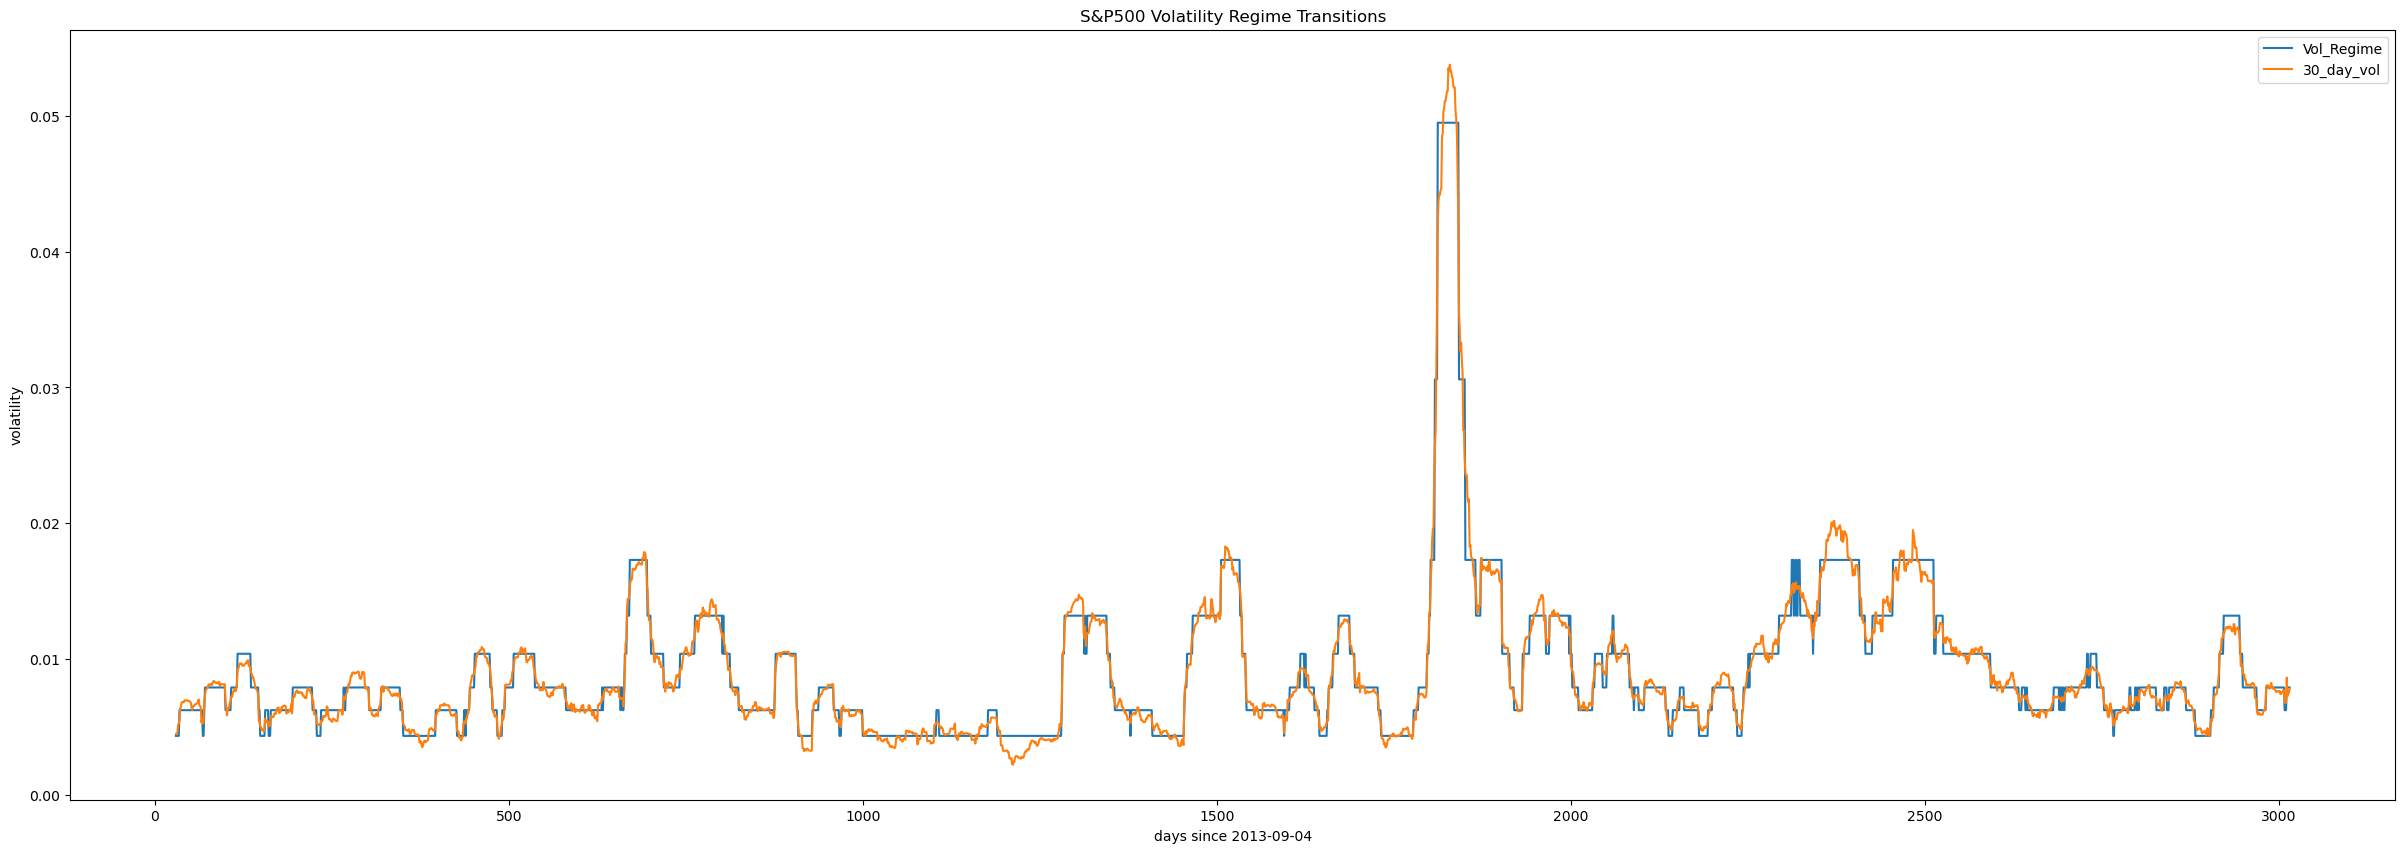

In [170]:
multiseries_trend_linechart(data_vol, series=['Cluster_Vol', '30_day_vol'], series_labels=['Vol_Regime', '30_day_vol'], figwidth=30, figheight=10, figtitle='S&P500 Volatility Regime Transitions', trend_axis_label='days since 2013-09-04', series_label='volatility')

# Calculate Transition Probability

In [171]:
# create cluster counts dataframe

data_vol_regime = data_vol.copy().drop(['Cluster_Vol'], axis=1)
data_vol_regime = data_vol_regime.groupby(['cluster']).agg([('Cluster_Vol', 'mean'), ('Count', 'size')]).droplevel(0, axis=1)
data_vol_regime

,Cluster_Vol,Count
cluster,,
0,0.004368,528
1,0.013211,347
2,0.049472,30
3,0.007930,707
4,0.017313,225
5,0.030593,13
6,0.006260,721
7,0.010408,415


In [172]:
# create the transitional probability table

data_vol_original = data_vol[['cluster']] #create a copy of dataframe for original volatility regime counts 
data_vol_shifted = data_vol.shift(periods=-1)[['cluster']].dropna().astype('int64') #create a copy of dataframe for counts of volatility regime in the next period   
vol_transition = data_vol_original.merge(data_vol_shifted, left_index=True, right_index=True, suffixes=('_from', '_to')).dropna()
vol_transition_table = pd.crosstab(vol_transition['cluster_from'], vol_transition['cluster_to'], normalize='index')
vol_transition_table

cluster_to,0,1,2,3,4,5,6,7
cluster_from,,,,,,,,
0,0.954545,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000
1,0.000000,0.927954,0.000000,0.000000,0.025937,0.000000,0.000000,0.046110
2,0.000000,0.000000,0.966667,0.000000,0.000000,0.033333,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.917847,0.000000,0.000000,0.056657,0.025496
4,0.000000,0.031111,0.000000,0.000000,0.955556,0.004444,0.000000,0.008889
5,0.000000,0.000000,0.076923,0.000000,0.076923,0.846154,0.000000,0.000000
6,0.031900,0.000000,0.000000,0.054092,0.000000,0.000000,0.911234,0.002774
7,0.000000,0.043373,0.000000,0.048193,0.000000,0.000000,0.000000,0.908434
